In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random

# Import API key
import api_keys


# Incorporated citipy to determine city based on 
# latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
country_code = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

In [6]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key  

In [32]:
# Temperature (*F*) vs. Latitude
lat = []
lng = []
temp = []
# Humidity (%) vs. Latitude
humidity = []
# Cloudiness (%) vs. Latitude
clouds = []
# Wind Speed (mph) vs. Latitude
wind = []
unique_cities = []

for city in cities:
    try:
        parameters = {"q": city}
        response = requests.get(url, params=parameters).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        unique_cities.append(city)
    except:
        print("city could not be found")        


In [22]:
weather_dict = {
    "City": unique_cities,
    "Cloudiness": clouds,
    "Temp": temp,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Wind Speed": wind
    
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()
weather_data.to_csv("weather_data.csv")

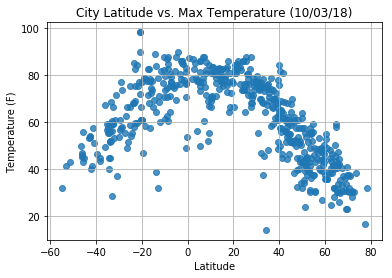

In [23]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Temp"],
            marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (10/03/18)")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

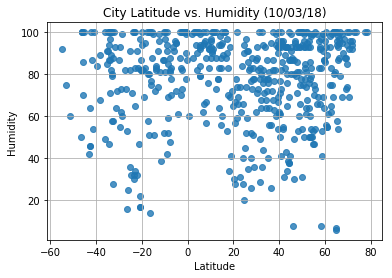

In [46]:
# Build a scatter plot for each data type
# area = np.pi*6
plt.scatter(weather_data["Lat"], weather_data["Humidity"],
            marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (10/03/18)")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

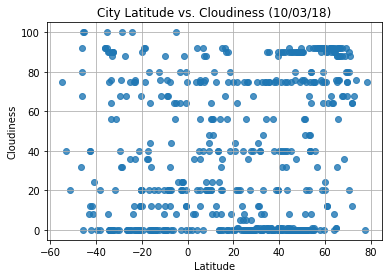

In [41]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"],
            marker="o",alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (10/03/18)")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

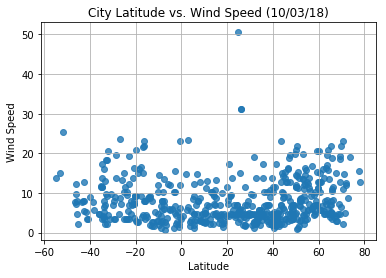

In [42]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o",
            alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (10/03/18)")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeedInWorldCities.png")

# Show plot
plt.show()